Due the day/time of the final.

Interactive grading will be June 8th through 15th (by either aron or Michael.)



Submit answers in a copy of this notebook.

In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. 

Ch. 7 Polynomial Transform LM question:

Plot the polynomial fit on the Pima dataset (included in HW2 folder) for degree 1 through 7 against the scatter plot of the data. Also note the change in the proportion of explained variance due to X, analyze (eg. bias/variance), and choose the appropriate degree fit.

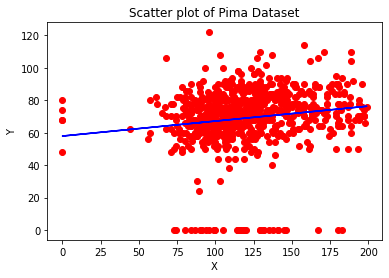

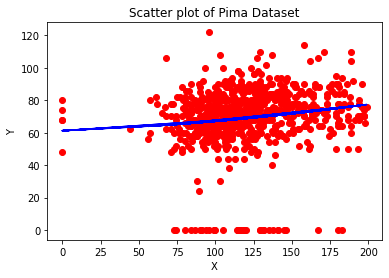

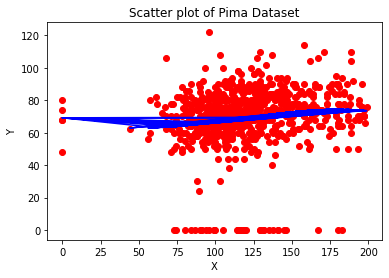

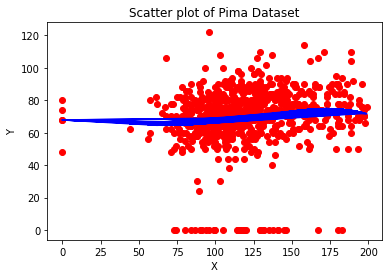

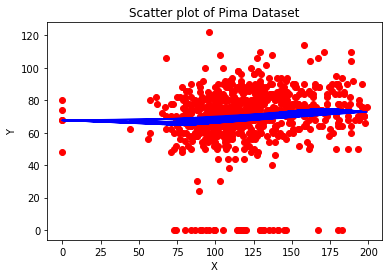

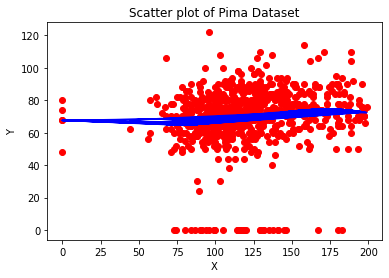

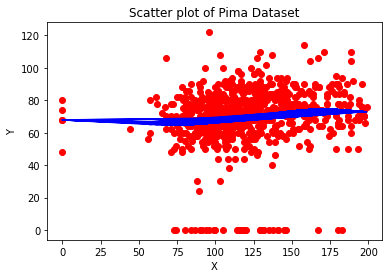

In [0]:
import pandas as pd
my_path = '/content/drive/My Drive/ecs171_yancey/Homework/Homework2_Ch7,9,NN/pima.csv'
# load .csv using Pandas library
pima = pd.read_csv(my_path)

# Get X and y datasets
X = pima.iloc[:, 1:2].values
y = pima.iloc[:, 2].values

# Get X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Fitting Linear Regression & Polynomial to the dataset
from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()
# lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures
for i in range(1,8):
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X)
  poly_reg.fit(X_poly, y)
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_poly, y)

  # Plot the dataset
  import numpy as np
  import matplotlib.pyplot as plt

  plt.scatter(X, y, color = 'red')
  plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
  plt.title('Scatter plot of Pima Dataset')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

# 2.

Ch. 7 GLM Question:

Demonstrate how both the **OVA** and **AVA** methods work by predicting the class with the highest probability evaluating each of the indivisual cases with binary class logistic regression on the Vertebrae data (eg. predicting class DH, SL, or NO). Verify using sklearn for automatic multi-class logistic regression.

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_2/column_3C.dat'
vert = pd.read_csv(my_path, sep=' ',header=None)

# turn column 6 into dummy variables & drop NA values
new_vert = pd.get_dummies(vert, columns=[6,])
new_vert = new_vert.dropna()

X = new_vert.iloc[:,:6]
Y = pd.DataFrame(new_vert.iloc[:,6:])

# ==================== OVA OPERATION ===================== #

# Get train & test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=30)

# GLM Fit the train & set datasets for the first 3 columns (DH, SL, NO)
import statsmodels.api as sm
models = []
y_preds = []

for i in range(0,3):
  model = sm.GLM(pd.DataFrame(y_train.iloc[:,i]).values.ravel(), X_train, family=sm.families.Binomial()).fit()
  y_pred = model.predict(X_test)
  
  models.append(model)
  y_preds.append(y_pred)

# Make a dataframe of the probabilities to analyze pred acc score in y_preds and y_test
y_preds = pd.concat(y_preds, axis=1)

# Get the highest pred acc score in y_preds and y_test
import numpy as np
y_preds_class = np.argmax(y_preds.values, axis=1)
y_test_class = np.argmax(y_test.values, axis=1)

# Get the accuracy score of y_test based on y_pred
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class, y_preds_class)

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


0.8

In [0]:
# ====================== AVA OPERATION =========================== #
import statsmodels.api as sm
import itertools

# Get each 2-item combination of predicting classes to create new train & test datasets
y_preds = []
combs = []

for a, b in itertools.combinations(("6_DH", "6_NO", "6_SL"), 2):
  combs.append([a,b])
  
  # get new X train dataset from original X train with combination a and b columns
  new_X_train = X_train[(y_train[a]==1) | (y_train[b]==1)]
  
  # get new Y train dataset from original Y train with combination a and b columns
  new_y_train = y_train[(y_train[a]==1) | (y_train[b]==1)][b]

  # GLM Fit
  model = sm.GLM(new_y_train, new_X_train, family=sm.families.Binomial()).fit()
  y_pred = model.predict(X_test) > 0.5 # predict from X_test values
  y_preds.append(y_pred)

# Make a dataframe for new y_preds score
y_preds = pd.concat(y_preds, axis=1)

# Create a table of DH, SL, NO
table = [[[0 for i in range(2)] for j in range(2)] for k in range(2)]
table[0][0][0] = 0   # DH
table[0][0][1] = 0   # DH
table[1][0][0] = 1   # NO
table[1][1][0] = 1   # NO
table[0][1][1] = 2   # SL
table[1][1][1] = 2   # SL

# From the table, create an array of predicted values
y_class = np.array([table[yp[0]][yp[1]][yp[2]] for yp in y_preds.values])

# Get accuracy score from y_test_class based on y_class
accuracy_score(y_test_class, y_class)

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


0.8333333333333334

In [0]:
# ================= SKLEARN TESTING ======================== #

# Fit transform the dataset and pick out column 6
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vert.iloc[:,6] = le.fit_transform(vert.iloc[:,6])
vert[6] = vert[6].astype('category')

# Create Y dataset with only column 6
Y = vert.iloc[:,6]
# print(Y.unique().tolist())

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Get dataframes for new y train and test datasets
y_train_2 = pd.DataFrame(vert.loc[X_train.index,6])
y_test_2 = pd.DataFrame(vert.loc[X_test.index,6])

#----------------------------------#

# WHEN MULTI-CLASS IS "AUTO"
model = LogisticRegression(multi_class = "auto", max_iter=2000) # avoid maximum iteration error
model.fit(X_train, y_train_2.values.ravel())
y_pred = model.predict(X_test)
print("AUTO prediction accuracy:", accuracy_score(y_pred, y_test_2))

# WHEN MULTI-CLASS IS "OVR"
# model = LogisticRegression(multi_class = "ovr", max_iter=2000) # avoid maximum iteration error
# model.fit(X_train, y_train_2.values.ravel())
# y_pred = model.predict(X_test)
# print("OVR prediction accuracy:", accuracy_score(y_pred, y_test_2))

# WHEN MULTI-CLASS IS "MULTINOMIAL"
# model = LogisticRegression(multi_class = "multinomial", max_iter=2000) # avoid maximum iteration error
# model.fit(X_train, y_train_2.values.ravel())
# y_pred = model.predict(X_test)
# print("MULTINOMIAL prediction accuracy:", accuracy_score(y_pred, y_test_2))

AUTO prediction accuracy: 0.8


# 3. 

Ch.9 SVM Question 1: 

**Kernel Trick:** Write a mathematical derivation and explanation on the purpose of the Kernel Trick in SVM. Please, include **Mercer's Theorem**, the **mapping** and **Kernel functions**, and **support vector**s in your formulation. (Make sure you understand it for interactive grading!) See the textbook if you forgot the dot product math. And, note that more math on SVM has been added to the textbook.

**Explain on the Purpose of Kernel Trick in SVM:**

The purpose of using Kernel functions in SVMs is to transform data into a higher dimensional space in which the data is linear-separable, meaning it is not necessary to compute the coordinates of the data.

The purpose can be explained by the inadequacy of how the loss functions in SVM operate, as below: 

- Transform all the points into into the higher dimensional space (mapping function)
- Find the support vectors
- Compute the dot products between points and support vectors 
- Fit and predict the products

Such operations will result in points that are large in values, which will take up spaces in the computers' memory. 

Hence, Kernel function can be applied to resolve such inadequacies. Kernel function is a function that ignores the mapping function where the same operations of loss functions in SVM can still be conducted at the original feature space. This will help reduce the complexity of finding the mapping function.

Mercer's Theorem is used to determine the conditions where functions can be considered as Kernel functions. Mercer's theorem says that the matrix must be "self-adjoint" which means that it is equal the conjugate transpose of itself. As Kernel functions can be written in form of matrix and are symmetric (since they are dot product of the mapping function), we say that Kernel functions meet the conditions of Mercer's Theoren and hence the mapping function is fused into the dot product, which helps prove the purpose of the Kernel Trick function. 

**Mathematical derivation**: 

$K(\vec{x_i},\vec{x_j}) = \phi(\vec{x_i})^T \phi(\vec{x_j})$, where $K$ is a Kernel function and $\vec{x_i}, \vec{x_j}$ are support vectors

Hence, Mercer's Theorem can also be written as a mathematical formula as below:

$c^TKc = \sum_{i=1}\sum_{j=1} c_ic_jK_{i,j} = \sum_{i=1}\sum_{j=1}c_ic_j \phi(\vec{x_i})\phi(\vec{x_j}) = (\sum_{i=1}c_i\phi(\vec{x_i}))(\sum_{j=1}c_j\phi(\vec{x_j})) = ||\sum_{j=1}c_j\phi(\vec{x_j})||^2$

where $c$ is a starting point of a support vector $\in R^n$, $n$ is the dimension of the matrix

Reference: https://homes.cs.washington.edu/~thickstn/docs/mercer.pdf

# 4. 

Ch.9 SVM Question 2: 

a. Import the breast cancer data as below (used to detect if cancer is malignant/0 or benign/1.) Write a function to determine the optimal (highest accuracy on test set)  degree and/or cost for rbf or polynomial kernels.  (You choose the inputs you think are appropriate.)

b. Plot at least 2 of the the support vectors (2-3 features per plot) for each kernel. 


c. Does changing the size of the test set change the optimal parameters? Why or why not? Does changing the parameters change the runtime? Why or why not?



In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np

def fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs):

  for d in ds:
    for C in Cs:
      clf = svm.SVC(kernel='poly', degree=d, gamma='auto', C=C)
      model = clf.fit(X_train, y_train.ravel()) 

      y_pred = model.predict(X_test)
      #print('d:',d, 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
      print('d:',d, 'C:',round(C,2), round(accuracy_score(y_pred, y_test),5))


def fineTuningRBF(X_train, X_test, y_train, y_test, Cs):

  for C in Cs:
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    model = clf.fit(X_train, y_train.ravel()) 

    y_pred = model.predict(X_test)
    #print( 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
    print('C:',round(C,2), round(accuracy_score(y_pred, y_test),5))

# =========================================================================== # 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
  """Create a mesh of points to plot in

  Parameters
  ----------
  x: data to base x-axis meshgrid on
  y: data to base y-axis meshgrid on
  h: stepsize for meshgrid, optional

  Returns
  -------
  xx, yy : ndarray
  """
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  """Plot the decision boundaries for a classifier.

  Parameters
  ----------
  ax: matplotlib axes object
  clf: a classifier
  xx: meshgrid ndarray
  yy: meshgrid ndarray
  params: dictionary of params to pass to contourf, optional
  """
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

In [0]:
# ========================== PART A ============================ #
import pandas as pd
import numpy as np
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target



In [0]:
# ========================== PART B ============================ #

In [0]:
# ========================== PART C ============================ #

# 5. 

NN Question:

Use `sklearn` MLP along with grid search to find an optimal prediction accuracy on the African Soil data from chapter 5. What do you think is the effect of having **p > n**, and why might NN be more or less appropriate than SVM or polynomials for this dataset?

In [0]:
import pandas as pd

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_5/training.csv'
soil = pd.read_csv(my_path)

X = soil.iloc[:,list(range(1,3594)) + [3497]]
Y = pd.DataFrame(soil.loc[:,'pH'])

# Create train & test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=250)

# MLP Fit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

mlp = MLPRegressor(hidden_layer_sizes=(30,30,30,))
mlp.fit(X_train, y_train.values.ravel())

y_pred = mlp.predict(X_test)

# Grid Search
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(30,30,30), (10,10), (30,),],
    'solver': ['sgd', 'adam'],
    'max_iter': [10, 50, 100]
}

# MLP Fit again with Grid Search
mlp2 = MLPRegressor()

clf = GridSearchCV(mlp2, parameter_space, n_jobs=-1, cv=7)
clf.fit(X_train, y_train.values.ravel())

# Find the best paramenters set and grid scores
print("Best parameters set found on development set:\n",
      clf.best_params_)
print("Grid scores on development set:\n")

# Get the mean and std scores - Professor Yancey's notes
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

# Get predicted value from X_test and get mean absolute error 
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

Best parameters set found on development set:
 {'hidden_layer_sizes': (30,), 'max_iter': 100, 'solver': 'sgd'}
Grid scores on development set:

0.184 (+/-0.211) for {'hidden_layer_sizes': (30, 30, 30), 'max_iter': 10, 'solver': 'sgd'}
0.189 (+/-0.236) for {'hidden_layer_sizes': (30, 30, 30), 'max_iter': 10, 'solver': 'adam'}
0.628 (+/-0.187) for {'hidden_layer_sizes': (30, 30, 30), 'max_iter': 50, 'solver': 'sgd'}
0.640 (+/-0.155) for {'hidden_layer_sizes': (30, 30, 30), 'max_iter': 50, 'solver': 'adam'}
0.641 (+/-0.138) for {'hidden_layer_sizes': (30, 30, 30), 'max_iter': 100, 'solver': 'sgd'}
0.547 (+/-0.244) for {'hidden_layer_sizes': (30, 30, 30), 'max_iter': 100, 'solver': 'adam'}
0.205 (+/-0.298) for {'hidden_layer_sizes': (10, 10), 'max_iter': 10, 'solver': 'sgd'}
0.042 (+/-0.241) for {'hidden_layer_sizes': (10, 10), 'max_iter': 10, 'solver': 'adam'}
0.566 (+/-0.319) for {'hidden_layer_sizes': (10, 10), 'max_iter': 50, 'solver': 'sgd'}
0.296 (+/-0.477) for {'hidden_layer_sizes':

0.4575969848291392

# 6. 

(Extra Credit) CNN Question:

Design a CNN in **Keras** with 3 convolutional layers to predict the fashion prodcut class from **Fashion-MNIST** (as loaded below). Use the `history` object of the return to Keras's `.fit()` function to plot and analyze the training `[acc]` and validation accuracy `[val_acc]` for each of the 15 epochs. Use 20/80 train/validation split. Hint: You can add the validation data as `validation_data` in the `.fit()` function.

Epoch 1/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4638 - val_loss: 0.3551
Epoch 2/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3059 - val_loss: 0.3210
Epoch 3/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2634 - val_loss: 0.2883
Epoch 4/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2331 - val_loss: 0.2714
Epoch 5/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2098 - val_loss: 0.2714
Epoch 6/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1899 - val_loss: 0.2752
Epoch 7/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1701 - val_loss: 0.2752
Epoch 8/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1543 - val_loss: 0.2845
Epoch 9/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1398 - val_loss: 0.3024
Epoch 10/15
1875/1875 [==============================] - 64s 34m

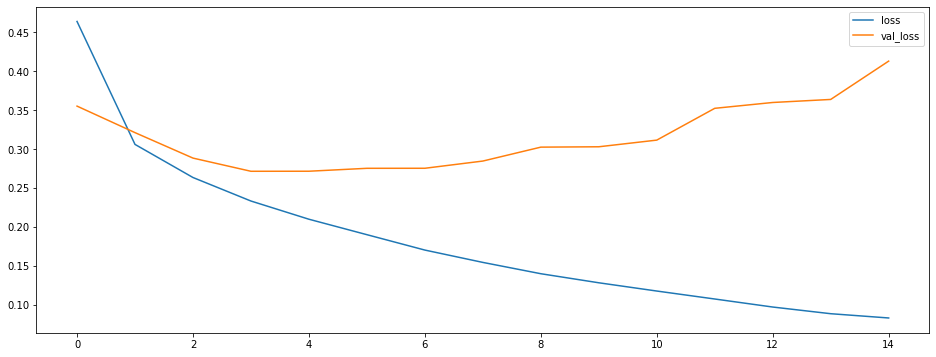

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Get train and test datasets from fashion_mnist
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Categorize the the train and test data into binary matrix
from tensorflow.keras.utils import to_categorical
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

# Normalize values to reshape in number of train images and test images
x_train = x_train/255
x_test = x_test/255
# plt.imshow(x_train[0])

x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.reshape(60000,28,28,1)


# =============== CREATE CNN MODEL ================ #
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, MaxPool2D, Dense, Conv2D
# from tensorflow.keras.callbacks import EarlyStopping

# Get early stopping
# stop = EarlyStopping(monitor="val_loss", mode="min",patience=5)

# Sequentialize to start building a CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (4,4), strides = (1,1), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 120, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

# 3rd Convolutional Layer
# TODO: Check this since it returns errors for not fiting into the 2nd layer

# Compile the CNN model
model.compile(optimizer = "adam", loss = "categorical_crossentropy")

# Fit the CNN model with features of original train, categorized train (binary)
# Add validation_data = (x_test, y_cat_test)
# Epochs = 15, get call back to early stop
model.fit(
    x_train,
    y_cat_train,
    validation_data=(x_test,y_cat_test),
    epochs=15, 
    # callbacks=[stop]
)

# Get the dataframe of the model & plot with size (16,6) 
metrics = pd.DataFrame(model.history.history)
metrics.plot(figsize = (16,6))

predict = model.predict_classes(x_test)
print(predict)